<h1>Implement Class Perceptrons</h1>

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
    """
    Perceptron Classifier
    input: 
        epochs (iterations) : Integer
        eta(learning_rate): Float 0 <= eta <= 1
        random_state : Integer
    """
    def __init__(self,eta,epochs,random_state = 42):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state

    def fit(self,X,y):
        """
        Parameters
        ----------
        X (features) : (n : rows, m : cols)
        y (target) : (n rows)
        w (weights vector) : (m , 1) --> w.T :(1,m)
        """
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0 , scale = 0.01, size = X.shape[1])
        self.b = float(0)
        self.errors = []
        for _ in range(self.epochs):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta * (target - self.predict_(xi))
                self.w += update * xi
                self.b += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self
            
    
    def net_input_(self,X):
        """ 
        calculate the net input
        X : array-like
        w.T * x + b is the descision boundary
        """
        return np.dot(X,self.w) + self.b
    
    def predict_(self,X):
        """ 
        Calculate  the prediction  

        X : array-like 
        
        if w.T * x  + b >= 0 classify as 1 else 0
        if w.T*x + b < 0 (and we are wrong) we need to increase w and b to make the model more accurate
        if w.T*x + b > 0 (and we are wrong) we need to decrease w and b to make the model more accurate

        """
        return np.where(self.net_input_(X) >= 0.0 , 1 ,0)

        

<h1>Use the model with data from UCI MLR (IRIS DATA)</h1>

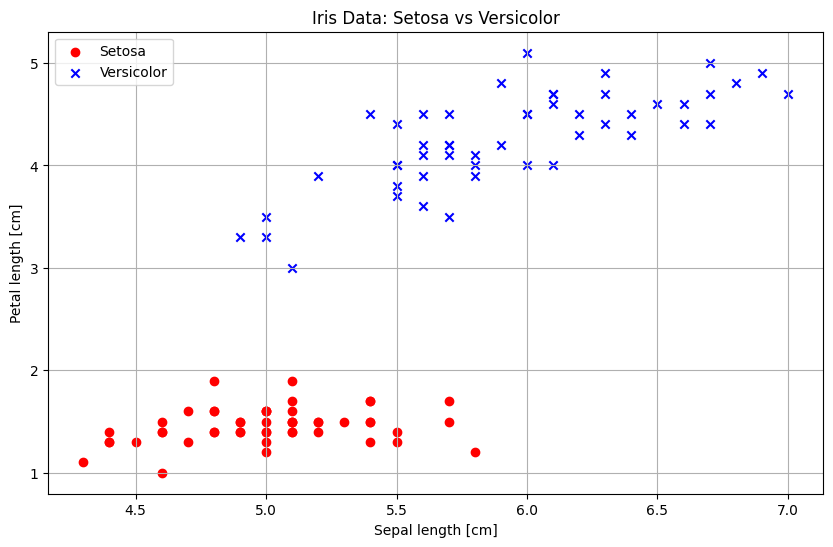

In [2]:
#Data is downloaded Locally within folder
iris_df = pd.read_csv('/Users/shivvinnybhutani/LocalShiv/Projects/ML_Python/iris_data.csv', header=0, encoding='utf-8')

y = iris_df.iloc[0:100, 4]
y = np.where(y == 'Setosa', 0, 1)
X = iris_df.iloc[0:100, [0, 2]].astype(float)

#sepal.length is now X[0] and petal.lengths is now X[1]
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[0:50, 0], X.iloc[0:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X.iloc[50:100, 0], X.iloc[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.title('Iris Data: Setosa vs Versicolor')
plt.legend(loc='upper left')
plt.grid()

plt.show()

<h1>Train Model</h1>

Text(0, 0.5, 'missclassifications per epoch')

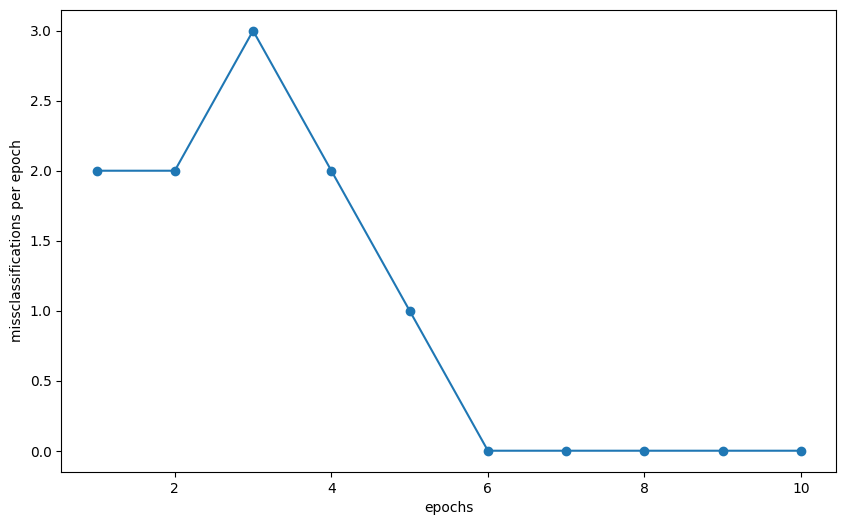

In [3]:
ppn = Perceptron(eta = 0.01, epochs = 10)
X_array = X.values
y_array = y
ppn.fit(X_array,y_array)
plt.figure(figsize=(10,6))
plt.plot(range(1,len(ppn.errors) + 1),ppn.errors, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('missclassifications per epoch')

<h1>Plot Descision Boundary</h1>

In [4]:
from matplotlib.colors import ListedColormap

def plot_descision_reigons(X,y,classifier,resolution = 0.02):
    markers = ('o','s','^','v','<')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a grid of points with the specified resolution (start,stop,step)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))

    grid_points = np.array([xx1.ravel(), xx2.ravel()]).T
    
    Z = classifier.predict_(grid_points)
    
    Z = Z.reshape(xx1.shape)
    
    # Plot the colored decision regions
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot the actual data points on top of the decision regions
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=[colors[idx]],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    

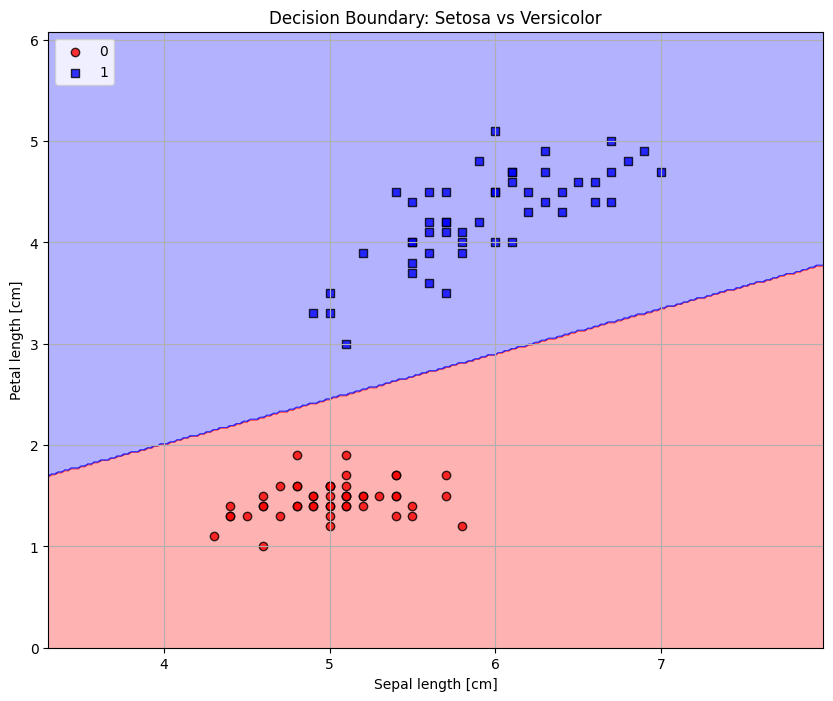

In [5]:
plt.figure(figsize=(10, 8))

# Call the function to visualize the decision boundary
plot_descision_reigons(X_array, y_array, ppn)

# Add labels and title
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.title('Decision Boundary: Setosa vs Versicolor')
plt.grid(True)
plt.show()